<a href="https://colab.research.google.com/github/ayberkcorp/cap5610-machine_learning/blob/master/hw1/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports/Reading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/ayberkcorp/cap5610-machine_learning/master/Titanic/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/ayberkcorp/cap5610-machine_learning/master/Titanic/test.csv')
combine = [train_df, test_df]

# Q5:

In [3]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [4]:
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

# Q6:

In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Q7:


In [6]:
train_df[["Age", "SibSp", "Parch", "Fare"]].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df[["Age", "SibSp", "Parch", "Fare"]].describe()

,Age,SibSp,Parch,Fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


# Q8:

In [8]:
train_df["PassengerId"] = train_df["PassengerId"].astype("category")
train_df["Survived"] = train_df["Survived"].astype("category")
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df[["PassengerId", "Survived", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]].describe()

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,204,889
unique,891,2,3,891,2,681,147,3
top,891,0,3,"Asim, Mr. Adola",male,1601,G6,S
freq,1,549,491,1,577,7,4,644


In [9]:
test_df["PassengerId"] = train_df["PassengerId"].astype("category")
test_df["Pclass"] = train_df["Pclass"].astype("category")
test_df[["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]].describe()

,PassengerId,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,418,418,91,418
unique,418,3,418,2,363,76,3
top,1,3,"Davidson, Mrs. Thornton (Orian Hays)",male,PC 17608,B57 B59 B63 B66,S
freq,1,236,1,266,5,3,270


# Q9:

In [10]:
train_df[["Survived", "Pclass"]].loc[train_df.Survived == 1].loc[train_df.Pclass == 1].count() / train_df[["Survived", "Pclass"]].loc[train_df.Survived == 1].count()

Survived    0.397661
Pclass      0.397661
dtype: float64

# Q10:

In [11]:
train_df[["Survived", "Sex"]].loc[train_df.Survived == 1].loc[train_df.Sex == "female"].count() / train_df[["Survived", "Sex"]].loc[train_df.Survived == 1].count()

Survived    0.681287
Sex         0.681287
dtype: float64

# Q11:

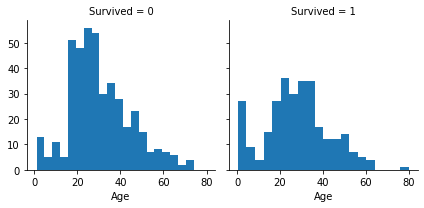

In [12]:
histo = sns.FacetGrid(train_df, col='Survived')
histo.map(plt.hist, 'Age', bins=20);

# Q12:

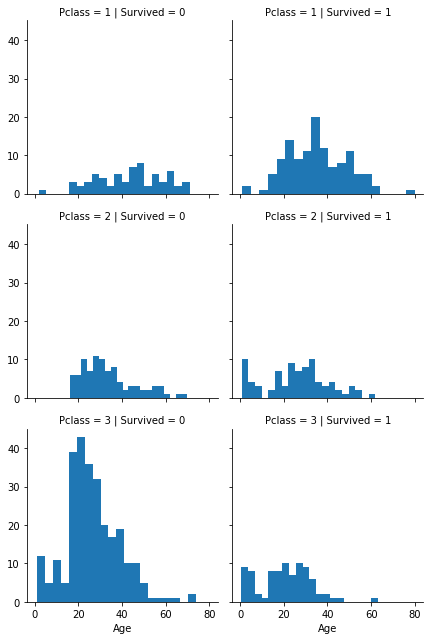

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

# Q13:

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


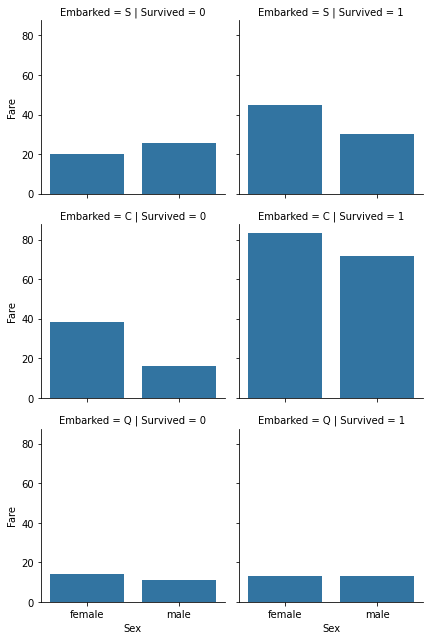

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked')
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend();

# Q16:

In [15]:
train_df["Gender"] = train_df["Sex"].astype("category").cat.codes
train_df["Gender"] = train_df["Gender"].replace({0:1, 1:0})
train_df["Gender"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Gender, Length: 891, dtype: int64

In [16]:
test_df["Gender"] = test_df["Sex"].astype("category").cat.codes
test_df["Gender"] = test_df["Gender"].replace({0:1, 1:0})
test_df["Gender"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Gender, Length: 418, dtype: int64

# Q17:

In [17]:
train_df["Age"].fillna(train_df["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [18]:
test_df["Age"].fillna(test_df["Age"].mean())

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

# Q18:

In [19]:
train_df[["Embarked", "PassengerId"]].groupby("Embarked").count()

,PassengerId
Embarked,
C,168
Q,77
S,644


In [20]:
train_df["Embarked"].fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

# Q19:

In [21]:
test_df["Fare"].fillna(test_df["Fare"].mode())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

# Q20:

In [22]:
train_df["Fare"] = pd.cut(train_df["Fare"], bins=[-0.001, 7.91, 14.454, 31.0, 512.329], right=True, labels=[0, 1, 2, 3])
train_df["Fare"]

0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: Fare, Length: 891, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [23]:
test_df["Fare"] = pd.cut(test_df["Fare"], bins=[-0.001, 7.91, 14.454, 31.0, 512.329], right=True, labels=[0, 1, 2, 3])
test_df["Fare"]

0      0
1      0
2      1
3      1
4      1
      ..
413    1
414    3
415    0
416    1
417    2
Name: Fare, Length: 418, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]